# Numpy and Vectorization

In [1]:
import numpy as np
import time

In [13]:
a = np.zeros(4)
print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.zeros((4,))
print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.random_sample(4)
print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4) :   a = [0.54628609 0.38933264 0.61857642 0.30871313], a shape = (4,), a data type = float64


In [19]:
def dot_with_loop(a, b):
    dot_product = 0
    for i in range(len(a)):
        dot_product += a[i] * b[i]
    return dot_product

In [20]:
np.random.seed(1)
a = np.random.rand(10000000)
b = np.random.rand(10000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()
print(c)
print(f'Time with vectorization: {toc-tic}')

tic = time.time()
c = dot_with_loop(a, b)
toc = time.time()
print(c)
print(f'time with vectorization: {toc-tic}')

2501072.58168132
Time with vectorization: 0.015624284744262695
2501072.5816813707
time with vectorization: 3.2247209548950195


In [21]:
# whats vector, matric?
# slicing, indexing, operators, ...

# Multiple Variable Linear Regression

In [24]:
# import packages
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=2)

In [50]:
x, y = datasets.make_regression(n_samples=100, n_features=3, noise=10)
print(f'X: {X}')
print(f'y: {y}')

X: [[ 1.2  -0.19 -1.06]
 [-0.32  0.91  0.76]
 [-0.4  -1.89  0.9 ]
 [-0.69 -0.73  1.97]
 [-0.86 -0.8  -0.54]
 [-0.1  -0.13  0.05]
 [-2.38  0.31 -1.68]
 [-0.2   0.75 -0.34]
 [-1.31  0.44 -0.39]
 [-0.92 -1.26  0.52]
 [-1.1   0.42 -0.36]
 [ 1.25  0.32 -0.16]
 [ 1.31  1.21  1.78]
 [-0.26  0.5  -0.  ]
 [-0.54  0.6   0.48]
 [ 2.26  0.4   1.48]
 [-1.56 -0.25  0.34]
 [-0.02  0.9   0.02]
 [-0.88 -0.03 -0.28]
 [ 0.02 -0.44 -0.76]
 [ 0.63  1.13  0.57]
 [ 0.38  0.94  0.57]
 [ 0.63 -1.1  -0.22]
 [-0.88 -0.13  0.32]
 [ 0.71 -1.05 -0.13]
 [-0.78  0.02 -0.38]
 [-1.23 -1.4  -2.3 ]
 [ 0.3   1.18 -0.48]
 [-1.08  0.41 -0.16]
 [ 1.02 -1.45  2.12]
 [ 0.14 -1.38 -1.33]
 [-0.21  0.95  0.11]
 [ 0.43 -0.45 -2.06]
 [ 0.74 -0.58 -0.34]
 [ 1.1  -0.43  1.51]
 [-1.46  0.51 -0.1 ]
 [-0.72 -0.08 -0.03]
 [ 0.06  0.13  1.92]
 [-0.02  0.99 -1.05]
 [ 0.16 -0.65 -0.29]
 [-0.04 -0.79 -1.38]
 [-2.65 -0.4   0.83]
 [-0.83 -0.66  0.44]
 [ 0.3  -0.24  0.19]
 [-1.36  0.82  0.61]
 [ 1.08 -0.62 -0.05]
 [ 2.72 -0.51 -0.63]
 [-0.24 -0

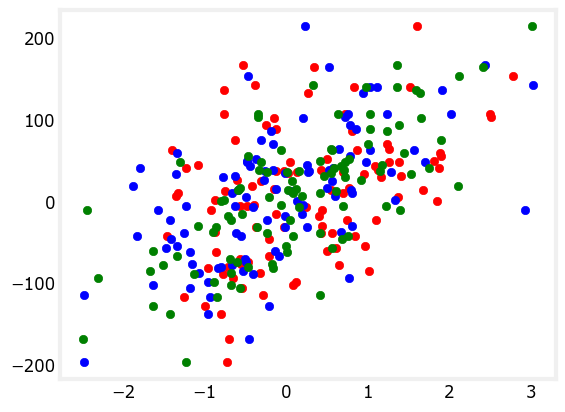

In [51]:
plt.scatter(x[:, 0], y, c='red')
plt.scatter(x[:, 1], y, c='blue')
plt.scatter(x[:, 2], y, c='green')

In [58]:
# initialize model
w_init = np.array([-2., -3., -4])
b_init = 1.

In [63]:
# compute cost
def compute_cost(x, y, w, b):
    cost = 0
    n_samples = x.shape[0]
    for sample in range(n_samples):
        f = np.dot(x[sample, :], w) + b
        cost += (f-y[sample])**2
    cost /= (2*n_samples)
    return cost

In [64]:
print(compute_cost(x, y, w_init, b_init))

3574.782291848482


In [74]:
# compute gradient
def compute_gradient(x, y, w, b):
    # retrieve 
    n_samples = x.shape[0]
    n_parameters = x.shape[1]
    # 
    dw = np.zeros(n_parameters)
    db = 0.
    
    for sample in range(n_samples):
        err = np.dot(w, x[sample, :]) + b - y[sample]
        for parameter in range(n_parameters):
            dw[parameter] += err * x[sample, parameter]
        db += err
    dw /= (2*n_samples)
    db /= (2*n_samples)
    
    return dw, db

In [75]:
dw, db = compute_gradient(x, y, w_init, b_init)
print(dw)
print(db)

[-16.98 -25.33 -32.87]
-3.7901195759349138


In [81]:
def gradient_descent(x, y, w, b, learning_rate, cost_function, gradient_function, iterations):
    
    n_parameters = x.shape[1]
    
    #loop over many iteration
    for i in range(iterations):
        #compute gradient
        dw, db = compute_gradient(x, y, w, b)
        #update parameter
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 1000 == 0:
            print(f'cost at {i}th --> {cost_function(x, y, w, b)}')
        
    return w, b

In [82]:
learning_rate = 0.001
iters = 10001
w, b = gradient_descent(x, y, w_init, b_init, learning_rate, compute_cost, compute_gradient, iters)

cost at 0th --> 3570.7335024271074
cost at 1000th --> 1179.3597573293855
cost at 2000th --> 419.7041526981803
cost at 3000th --> 172.5961676205137
cost at 4000th --> 90.66740119280168
cost at 5000th --> 63.074838235169466
cost at 6000th --> 53.654900999110204
cost at 7000th --> 50.39790359448437
cost at 8000th --> 49.25724069499858
cost at 9000th --> 48.85221096803666
cost at 10000th --> 48.706161735611985
